# MORTALITY RISK PREDICTION OF HEART FAILURE PATIENTS

In [246]:
#Importation of Libraries for analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [247]:
#Importing and reading heartfailure clinical records data csv file using its file path into pandas dataframe
hf_df=pd.read_csv("C:/Users/Jernie/OneDrive/Desktop/heart_failure_clinical_records.csv") 

In [248]:
#previewing first 5 rows of the data
hf_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection fraction,high blood pressure,platelets,serum creatinine,serum sodium,sex ( female or male),smoking status,time ( number of times they followed up at the hospital ),DEATH EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


# Data Preprocessing

In [250]:
#Changing Index from 0 to 1 and rounding age
hf_df.index = hf_df.index + 1
hf_df['age'] = hf_df['age'].astype(int)

In [251]:
#renaming all columns
hf_df.columns = ['age', 'anaemia', 'creatininephosphokinase', 'diabetes', 'ejectionfraction', 'highbloodpressure', 'platelets', 
              'serumcreatinine', 'serumsodium', 'gender', 'smokingstatus', 'followupdays', 'deathevent']

In [252]:
#Reading the data
hf_df

,age,anaemia,creatininephosphokinase,diabetes,ejectionfraction,highbloodpressure,platelets,serumcreatinine,serumsodium,gender,smokingstatus,followupdays,deathevent
1,55,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
2,65,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
3,45,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
4,60,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
5,95,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,45,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4997,60,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4998,95,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4999,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [253]:
#checking if there are missing values

missing_values = hf_df.isnull().sum()
print(missing_values)

age                        0
anaemia                    0
creatininephosphokinase    0
diabetes                   0
ejectionfraction           0
highbloodpressure          0
platelets                  0
serumcreatinine            0
serumsodium                0
gender                     0
smokingstatus              0
followupdays               0
deathevent                 0
dtype: int64


In [254]:
#Background Information about the data
hf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int32  
 1   anaemia                  5000 non-null   int64  
 2   creatininephosphokinase  5000 non-null   int64  
 3   diabetes                 5000 non-null   int64  
 4   ejectionfraction         5000 non-null   int64  
 5   highbloodpressure        5000 non-null   int64  
 6   platelets                5000 non-null   float64
 7   serumcreatinine          5000 non-null   float64
 8   serumsodium              5000 non-null   int64  
 9   gender                   5000 non-null   int64  
 10  smokingstatus            5000 non-null   int64  
 11  followupdays             5000 non-null   int64  
 12  deathevent               5000 non-null   int64  
dtypes: float64(2), int32(1), int64(10)
memory usage: 488.4 KB


In [255]:
#Describing entire data
hf_df.describe()

,age,anaemia,creatininephosphokinase,diabetes,ejectionfraction,highbloodpressure,platelets,serumcreatinine,serumsodium,gender,smokingstatus,followupdays,deathevent
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.282600,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697218,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [256]:
#Readingshape of data
hf_df.shape

(5000, 13)

In [257]:
#Reading type of data
type(hf_df.columns)

pandas.core.indexes.base.Index

In [258]:
#counting frequency of entries for all variables using a loop
for h in hf_df.columns:
    print(hf_df[h].value_counts())

age
60    627
50    496
65    439
70    407
45    327
55    276
58    187
53    187
75    172
42    156
63    134
72    126
68    112
40    101
85     88
80     86
52     85
59     71
62     68
73     65
82     58
46     55
49     55
51     54
69     54
61     50
44     41
90     41
48     40
66     40
95     37
64     36
87     24
41     23
77     23
56     22
67     21
78     17
54     17
43     14
57     13
86     12
79     12
81     11
94     11
47      8
71      1
Name: count, dtype: int64
anaemia
0    2628
1    2372
Name: count, dtype: int64
creatininephosphokinase
582     769
66       73
129      70
102      65
68       61
       ... 
1333      1
672       1
98        1
204       1
807       1
Name: count, Length: 290, dtype: int64
diabetes
0    2803
1    2197
Name: count, dtype: int64
ejectionfraction
35    771
40    709
38    628
30    599
25    591
60    485
45    353
50    345
20    325
55     48
15     44
17     33
62     26
65     15
70     11
14      9
80      8
Name: cou

In [259]:
#replacing binary data to text labels for tableau visualization
replace_dict = {0:'Female',1:'Male'}

hf_df['gender'] = hf_df['gender'].replace(replace_dict)  
replace_dict = {1:'high blood pressure',0:'No highbloood pressure'}
hf_df['highbloodpressure'] = hf_df['highbloodpressure'].replace(replace_dict)
replace_dict = {1:'anaemia',0:'No anaemia'}
hf_df['anaemia'] = hf_df['anaemia'].replace(replace_dict)
replace_dict = {1:'Diabetes',0:'No Diabetes'}
hf_df['diabetes'] = hf_df['diabetes'].replace(replace_dict)
replace_dict = {1:'smoking',0:'No smoking'}
hf_df['smokingstatus'] = hf_df['smokingstatus'].replace(replace_dict)

In [260]:
hf_df

,age,anaemia,creatininephosphokinase,diabetes,ejectionfraction,highbloodpressure,platelets,serumcreatinine,serumsodium,gender,smokingstatus,followupdays,deathevent
1,55,No anaemia,748,No Diabetes,45,No highbloood pressure,263358.03,1.3,137,Male,smoking,88,0
2,65,No anaemia,56,No Diabetes,25,No highbloood pressure,305000.00,5.0,130,Male,No smoking,207,0
3,45,No anaemia,582,Diabetes,38,No highbloood pressure,319000.00,0.9,140,Female,No smoking,244,0
4,60,anaemia,754,Diabetes,40,high blood pressure,328000.00,1.2,126,Male,No smoking,90,0
5,95,anaemia,582,No Diabetes,30,No highbloood pressure,461000.00,2.0,132,Male,No smoking,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,45,No anaemia,582,Diabetes,55,No highbloood pressure,543000.00,1.0,132,Female,No smoking,250,0
4997,60,anaemia,582,No Diabetes,30,high blood pressure,127000.00,0.9,145,Female,No smoking,95,0
4998,95,anaemia,112,No Diabetes,40,high blood pressure,196000.00,1.0,138,Female,No smoking,24,1
4999,65,anaemia,160,Diabetes,20,No highbloood pressure,327000.00,2.7,116,Female,No smoking,8,1


In [261]:
#Separating DataFrame hf_df into two subsets based on gender:(male) and (female)
male = hf_df[hf_df['gender']=='Male']
female = hf_df[hf_df['gender']=='Female']

In [262]:
#Accessing gender variable and counting frequency of entries for gender variable
gender_count= hf_df['gender'].value_counts()
gender_count

gender
Male      3228
Female    1772
Name: count, dtype: int64

In [263]:
#changing lables back to numerical format suitable for analysis
replace_dict = {'Female':'0','Male' : '1'}

hf_df['gender'] = hf_df['gender'].replace(replace_dict)  
replace_dict = {'high blood pressure':'1','No highbloood pressure':'0'}
hf_df['highbloodpressure'] = hf_df['highbloodpressure'].replace(replace_dict)
replace_dict = {'anaemia':'1', 'No anaemia' :'0'}
hf_df['anaemia'] = hf_df['anaemia'].replace(replace_dict)
replace_dict = {'Diabetes' :'1','No Diabetes':'0'}
hf_df['diabetes'] = hf_df['diabetes'].replace(replace_dict)
replace_dict = {'smoking':'1','No smoking' :'0'}
hf_df['smokingstatus'] = hf_df['smokingstatus'].replace(replace_dict)
hf_df

,age,anaemia,creatininephosphokinase,diabetes,ejectionfraction,highbloodpressure,platelets,serumcreatinine,serumsodium,gender,smokingstatus,followupdays,deathevent
1,55,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
2,65,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
3,45,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
4,60,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
5,95,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,45,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4997,60,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4998,95,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4999,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [264]:
#Independent variables on dependent variables Correlation
hf_df.corr()

,age,anaemia,creatininephosphokinase,diabetes,ejectionfraction,highbloodpressure,platelets,serumcreatinine,serumsodium,gender,smokingstatus,followupdays,deathevent
age,1.000000,0.122550,-0.064399,-0.100531,0.069426,0.092343,-0.025056,0.178292,-0.026088,0.072884,0.023862,-0.220461,0.249404
anaemia,0.122550,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatininephosphokinase,-0.064399,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,-0.100531,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejectionfraction,0.069426,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
highbloodpressure,0.092343,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.025056,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serumcreatinine,0.178292,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serumsodium,-0.026088,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
gender,0.072884,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


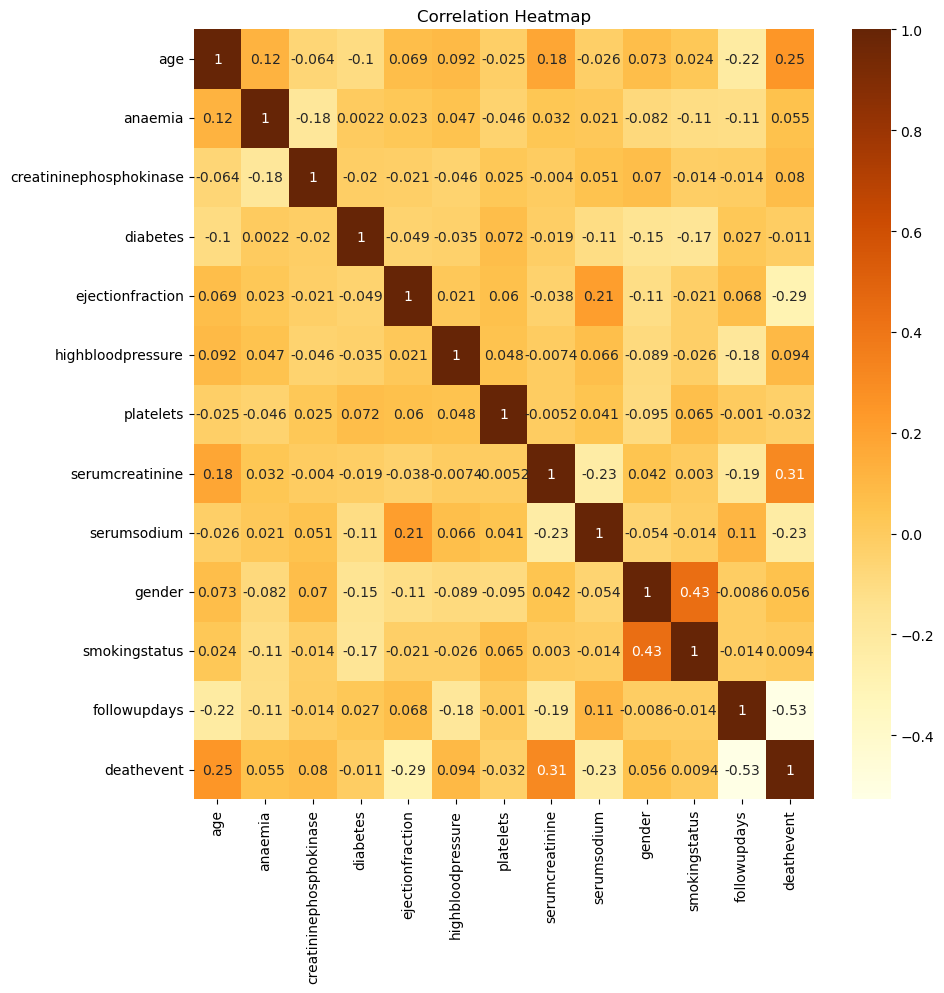

In [265]:
#Plotting Correlation Heat Map to find the correlation between the independent Variables and dependent variable
plt.figure(figsize=(10,10))
sns.heatmap(hf_df.corr(),annot=True,cmap='YlOrBr')
plt.title('Correlation Heatmap')
plt.show()

In [266]:
#Creating a list of cols containing all the column names
cols = []

for c in hf_df.columns:
    cols = cols + [c]

cols

['age',
 'anaemia',
 'creatininephosphokinase',
 'diabetes',
 'ejectionfraction',
 'highbloodpressure',
 'platelets',
 'serumcreatinine',
 'serumsodium',
 'gender',
 'smokingstatus',
 'followupdays',
 'deathevent']

In [267]:
#creating list qualitative columns and dropping quantitative columns
cols_to_remove = ['age', 'creatininephosphokinase', 'ejectionfraction',  'platelets',
 'serumcreatinine', 'serumsodium', 'followupdays'  ] 
for c in cols_to_remove:
    cols.remove(c)

cols

['anaemia',
 'diabetes',
 'highbloodpressure',
 'gender',
 'smokingstatus',
 'deathevent']

In [268]:
#create dummy variables to replace qualitative columns
hf_df= pd.get_dummies(hf_df, columns=cols, drop_first=True, dtype =int) 
hf_df

,age,creatininephosphokinase,ejectionfraction,platelets,serumcreatinine,serumsodium,followupdays,anaemia_1,diabetes_1,highbloodpressure_1,gender_1,smokingstatus_1,deathevent_1
1,55,748,45,263358.03,1.3,137,88,0,0,0,1,1,0
2,65,56,25,305000.00,5.0,130,207,0,0,0,1,0,0
3,45,582,38,319000.00,0.9,140,244,0,1,0,0,0,0
4,60,754,40,328000.00,1.2,126,90,1,1,1,1,0,0
5,95,582,30,461000.00,2.0,132,50,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,45,582,55,543000.00,1.0,132,250,0,1,0,0,0,0
4997,60,582,30,127000.00,0.9,145,95,1,0,1,0,0,0
4998,95,112,40,196000.00,1.0,138,24,1,0,1,0,0,1
4999,65,160,20,327000.00,2.7,116,8,1,1,0,0,0,1


In [269]:
#Calling Columns in data
hf_df.columns

Index(['age', 'creatininephosphokinase', 'ejectionfraction', 'platelets',
       'serumcreatinine', 'serumsodium', 'followupdays', 'anaemia_1',
       'diabetes_1', 'highbloodpressure_1', 'gender_1', 'smokingstatus_1',
       'deathevent_1'],
      dtype='object')

In [270]:
#renaming dummy variable columns
hf_df.rename(columns= {'anaemia_1': 'anaemia_dummy', 'diabetes_1': 'diabetes_dummy', 'highbloodpressure_1' : 'highbloodpressure_dummy', 
                       'gender_1': 'male', 'smokingstatus_1': 'smoking_dummy', 'deathevent_1' : 'deathevent'}, inplace=True)

In [271]:
hf_df

,age,creatininephosphokinase,ejectionfraction,platelets,serumcreatinine,serumsodium,followupdays,anaemia_dummy,diabetes_dummy,highbloodpressure_dummy,male,smoking_dummy,deathevent
1,55,748,45,263358.03,1.3,137,88,0,0,0,1,1,0
2,65,56,25,305000.00,5.0,130,207,0,0,0,1,0,0
3,45,582,38,319000.00,0.9,140,244,0,1,0,0,0,0
4,60,754,40,328000.00,1.2,126,90,1,1,1,1,0,0
5,95,582,30,461000.00,2.0,132,50,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,45,582,55,543000.00,1.0,132,250,0,1,0,0,0,0
4997,60,582,30,127000.00,0.9,145,95,1,0,1,0,0,0
4998,95,112,40,196000.00,1.0,138,24,1,0,1,0,0,1
4999,65,160,20,327000.00,2.7,116,8,1,1,0,0,0,1


# CLASSIFIERS

In [273]:
#dropping y variable - death event to become target variable
new_x = hf_df.drop(columns=['deathevent'])
new_x

,age,creatininephosphokinase,ejectionfraction,platelets,serumcreatinine,serumsodium,followupdays,anaemia_dummy,diabetes_dummy,highbloodpressure_dummy,male,smoking_dummy
1,55,748,45,263358.03,1.3,137,88,0,0,0,1,1
2,65,56,25,305000.00,5.0,130,207,0,0,0,1,0
3,45,582,38,319000.00,0.9,140,244,0,1,0,0,0
4,60,754,40,328000.00,1.2,126,90,1,1,1,1,0
5,95,582,30,461000.00,2.0,132,50,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,45,582,55,543000.00,1.0,132,250,0,1,0,0,0
4997,60,582,30,127000.00,0.9,145,95,1,0,1,0,0
4998,95,112,40,196000.00,1.0,138,24,1,0,1,0,0
4999,65,160,20,327000.00,2.7,116,8,1,1,0,0,0


In [274]:
#defining x and target variable
new_y = hf_df['deathevent']
new_x = hf_df[['age', 'creatininephosphokinase', 'ejectionfraction', 'platelets',
       'serumcreatinine', 'serumsodium', 'followupdays', 'anaemia_dummy',
       'diabetes_dummy', 'highbloodpressure_dummy', 'male', 'smoking_dummy']]

In [275]:
#creating standard scaler object
scaler = StandardScaler()

In [276]:
#overwriting x variables
new_x = scaler.fit_transform(new_x.values)

In [277]:
#training a test split object with a 10% (0.1) test data frame since entire data is small
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size = 0.25, random_state = 42)

In [278]:
#vars is short form of variables
vars = [new_x_train, new_x_test, new_y_train, new_y_test]
for v in vars:
    print(v.shape)

(3750, 12)
(1250, 12)
(3750,)
(1250,)


# LOGISTIC REGRESSION

In [280]:
#Creating logistic regression object
logit = LogisticRegression(max_iter=10000)

In [281]:
#Fitting and Training the model
logit.fit(new_x_train, new_y_train)

LogisticRegression(max_iter=10000)

In [282]:
# Predict on the test set
new_y_pred_logit = logit.predict(new_x_test)

In [283]:
#Evaluate the models performance
classification_report_logit = classification_report(new_y_test, new_y_pred_logit)
print(classification_report_logit)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       881
           1       0.74      0.73      0.73       369

    accuracy                           0.84      1250
   macro avg       0.81      0.81      0.81      1250
weighted avg       0.84      0.84      0.84      1250



# Grid Search

In [285]:
# Defining a parameter grid for hyperparameter tuning of a Logistic Regression model.
param_grid_lr = {
    'C': [0.01,0.1,1,10,100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100,200, 500]
}

#Initialize the grid search with cross-validation
grid_search_lr = GridSearchCV(LogisticRegression(max_iter = 10000, random_state=42), param_grid_lr, cv=5, verbose=0, n_jobs=-1)

#Fit the grid search
grid_search_lr.fit(new_x_train, new_y_train)

#Retrieve the best parameters and the best estimator
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_

#Predict on the test set using the best estimator
new_y_pred_best_lr = best_estimator_lr.predict(new_x_test)

#Evaluate the model"s performance
accuracy_best_lr = accuracy_score(new_y_test, new_y_pred_best_lr)
confusion_mat_best_lr = confusion_matrix(new_y_test, new_y_pred_best_lr)
classification_rep_best_lr = classification_report(new_y_test, new_y_pred_best_lr)

print(best_params_lr)
print(accuracy_best_lr)
print(confusion_mat_best_lr)
print(classification_rep_best_lr)

{'C': 0.01, 'max_iter': 100, 'solver': 'saga'}
0.8432
[[801  80]
 [116 253]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       881
           1       0.76      0.69      0.72       369

    accuracy                           0.84      1250
   macro avg       0.82      0.80      0.81      1250
weighted avg       0.84      0.84      0.84      1250



# Grid Search Confusion Matrix

<Figure size 1000x1000 with 0 Axes>

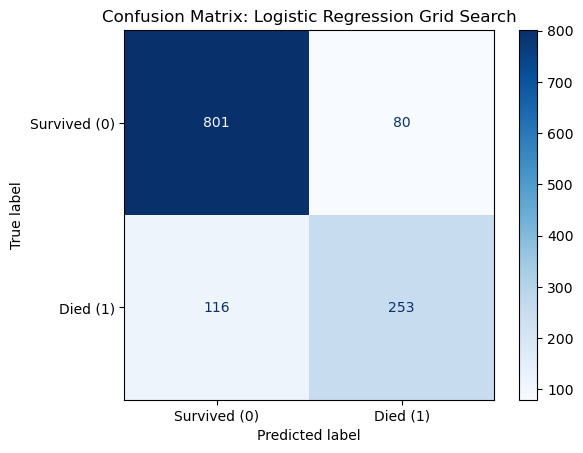

In [287]:
#plotting confusion matrix using matplotlib
#values format .0f= f for float plus 0 decimals   cmap givng range of blues
display_logit_grid = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_best_lr, display_labels = ['Survived (0)', 'Died (1)'])

plt.figure(figsize=(10,10))

display_logit_grid.plot(cmap='Blues', values_format = '.0f')
plt.title("Confusion Matrix: Logistic Regression Grid Search")
plt.show()

# Basic Confusion Matrix

In [289]:
#printing the confusion matrix for the predicted labels (new_y_pred_logit) compared to the actual labels (new_y_test).
confusion_mat = confusion_matrix(new_y_test, new_y_pred_logit)
print(confusion_mat)

[[788  93]
 [101 268]]


<Figure size 1000x1000 with 0 Axes>

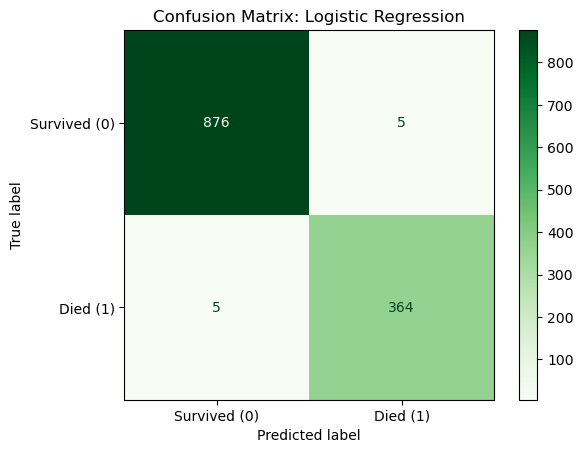

In [372]:
#plotting confusion matrix using matplotlib
#values format .0f= f for float plus 0 decimals   cmap givng range of blues
display_logit = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['Survived (0)', 'Died (1)'])

plt.figure(figsize=(10,10))

display_logit.plot(cmap='Greens', values_format = '.0f')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# K-NEAREST NEIGHBORS 

In [292]:
# Creating a k-nearest neighbors classifier with 3 nearest neighbors for predictions
knn = KNeighborsClassifier(n_neighbors=3)

In [293]:
#fitting and training model
#printing the confusion matrix for the predicted labels (new_y_pred_logit) compared to the actual labels (new_y_test).
knn.fit(new_x_train, new_y_train)
new_y_pred_knn = knn.predict(new_x_test)

classification_report_knn = classification_report(new_y_test, new_y_pred_knn)
print(classification_report_knn)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       881
           1       0.96      0.96      0.96       369

    accuracy                           0.98      1250
   macro avg       0.97      0.97      0.97      1250
weighted avg       0.98      0.98      0.98      1250



# Grid Search

In [295]:
# Defining a parameter grid for hyperparameter tuning of a K-Nearest Neighbors Model
param_grid_knn = {
    'n_neighbors' : [1, 3, 5],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

#Initialize the grid search with cross-validation
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=0, n_jobs=-1)

#Fit the grid search
grid_search_knn.fit(new_x_train, new_y_train)

#Retrieve the best parameters and the best estimator
best_params_knn = grid_search_knn.best_params_
best_estimator_knn = grid_search_knn.best_estimator_

#Predict on the test set using the best estimator
new_y_pred_best_knn = best_estimator_knn.predict(new_x_test)

#Evaluate the model"s performance
accuracy_best_knn = accuracy_score(new_y_test, new_y_pred_best_knn)
confusion_mat_best_knn = confusion_matrix(new_y_test, new_y_pred_best_knn)
classification_rep_best_knn = classification_report(new_y_test, new_y_pred_best_knn)

print(best_params_knn)
print(accuracy_best_knn)
print(confusion_mat_best_knn)
print(classification_rep_best_knn)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
0.98
[[869  12]
 [ 13 356]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.97      0.96      0.97       369

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250



# Grid Search Confusion Matrix

[]

<Figure size 1000x1000 with 0 Axes>

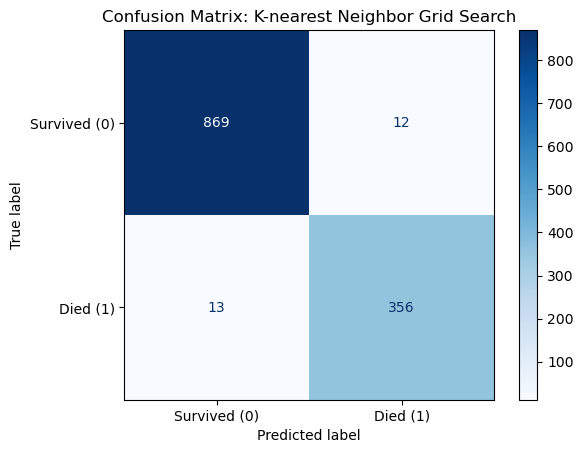

In [297]:
#Plotting Confusion Matrix to show the summary of model's grid search performance
confusion_mat = confusion_matrix(new_y_test, new_y_pred_knn)
display_knn_grid = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_best_knn, display_labels = ['Survived (0)', 'Died (1)'])

plt.figure(figsize=(10,10))

display_knn_grid.plot(cmap='Blues', values_format = '.0f')
plt.title("Confusion Matrix: K-nearest Neighbor Grid Search")

plt.plot()

# Basic Confusion Matrix - Classifier

[]

<Figure size 1000x1000 with 0 Axes>

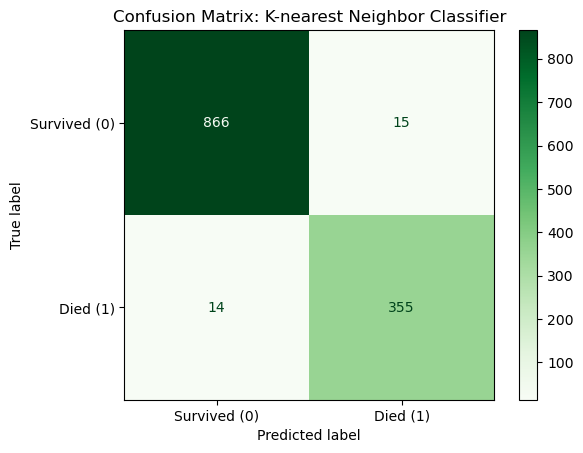

In [299]:
#Plotting confusion matrix of the model's basic performance
confusion_mat = confusion_matrix(new_y_test, new_y_pred_knn)
display_knn = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['Survived (0)', 'Died (1)'])

plt.figure(figsize=(10,10))

display_knn.plot(cmap='Greens', values_format = '.0f')
plt.title("Confusion Matrix: K-nearest Neighbor Classifier")

plt.plot()

# DECISION TREE CLASSIFIER

In [301]:
#creating Decision tree object and fitting to model
dt = DecisionTreeClassifier(random_state =35)

dt.fit(new_x_train, new_y_train)
new_y_pred_dt = dt.predict(new_x_test)

classification_report_dt = classification_report(new_y_test, new_y_pred_dt)
print(classification_report_dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.97      0.97      0.97       369

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250



# Grid Search

In [303]:
param_grid_dt = {
    'criterion' : ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth' : [None, 10, 20 ,30 ,40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Initialize the grid search with cross-validation
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, verbose=0, n_jobs=-1)

#Fit the grid search
grid_search_dt.fit(new_x_train, new_y_train)

#Retrieve the best parameters and the best estimator
best_params_dt = grid_search_dt.best_params_
best_estimator_dt = grid_search_dt.best_estimator_

#Predict on the test set using the best estimator
new_y_pred_best_dt = best_estimator_dt.predict(new_x_test)

#Evaluate the model's performance
accuracy_best_dt = accuracy_score(new_y_test, new_y_pred_best_dt)
confusion_mat_best_dt = confusion_matrix(new_y_test, new_y_pred_best_dt)
classification_rep_best_dt = classification_report(new_y_test, new_y_pred_best_dt)

print(best_params_dt)
print(accuracy_best_dt)
print(confusion_mat_best_dt)
print(classification_rep_best_dt)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.984
[[873   8]
 [ 12 357]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.98      0.97      0.97       369

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250



# Grid Search Confusion Matrix

[]

<Figure size 1000x1000 with 0 Axes>

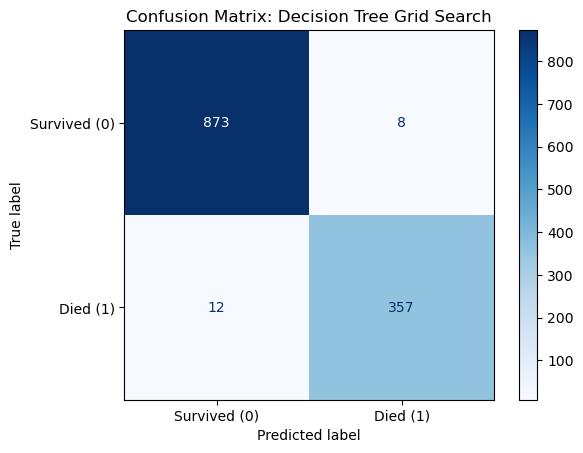

In [305]:
#Plotting confusion matrix to show summary of model's grid search performance
confusion_mat = confusion_matrix(new_y_test, new_y_pred_dt)
display_dt_grid = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_best_dt, display_labels = ['Survived (0)', 'Died (1)'])

plt.figure(figsize=(10,10))

display_dt_grid.plot(cmap='Blues', values_format = '.0f')
plt.title("Confusion Matrix: Decision Tree Grid Search")

plt.plot()

# Confusion Matrix - Classifer

[]

<Figure size 1000x1000 with 0 Axes>

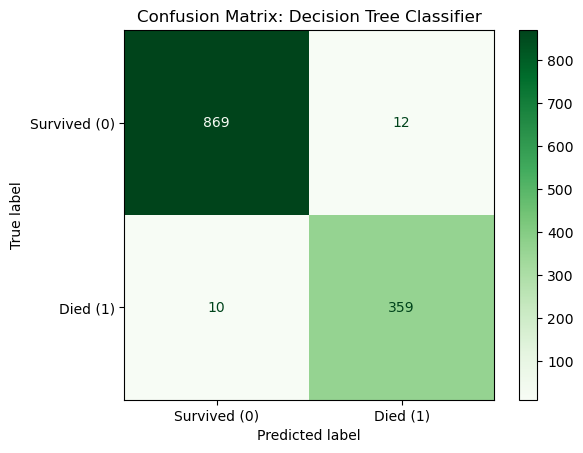

In [307]:
#PLotting confusion matrix to see summary of model's basic performance
confusion_mat = confusion_matrix(new_y_test, new_y_pred_dt)
display_dt = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['Survived (0)', 'Died (1)'])

plt.figure(figsize=(10,10))

display_dt.plot(cmap='Greens', values_format = '.0f')
plt.title("Confusion Matrix: Decision Tree Classifier")

plt.plot()

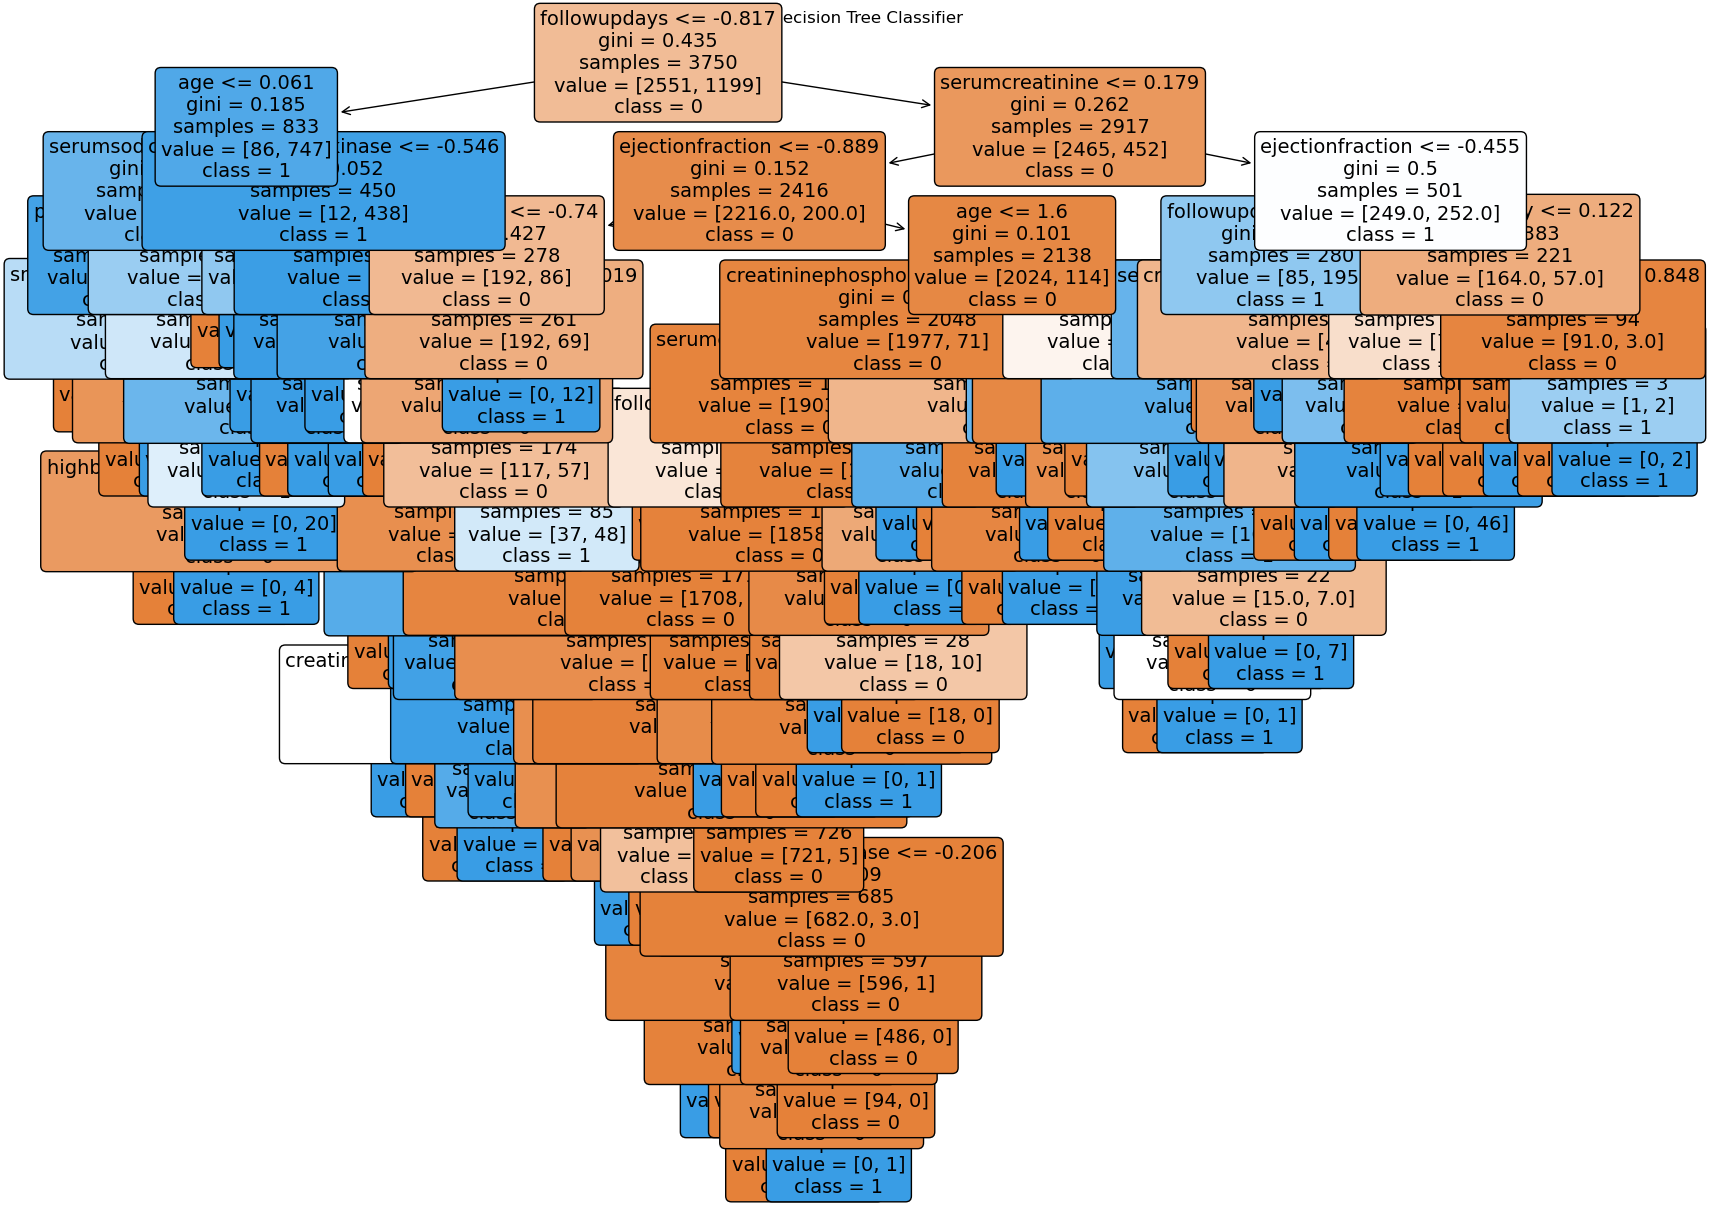

In [308]:
#Plotting decision tree map
from sklearn.tree import plot_tree
new_x = hf_df.drop(columns=['deathevent'], axis=1)
cols = list(new_x)

plt.figure(figsize=(20, 15))
plot_tree(dt, feature_names=cols, class_names=['0', '1'], filled=True, rounded=True, fontsize=14)
plt.title("Decision Tree Classifier")
plt.show()

# RANDOM FOREST

In [310]:
#initializing Random Forest Classifier with a fixed random state, training it on the training data (new_x_train and new_y_train), and using it to
#predict the test data (new_x_test).

rf =RandomForestClassifier(random_state=35)

rf.fit(new_x_train, new_y_train)

new_y_pred_rf = rf.predict(new_x_test)

In [311]:
#Evaluating model performance
classification_report_rf = classification_report(new_y_test, new_y_pred_rf)
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.99      0.99      0.99       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



# Grid Search

In [313]:
param_grid_rf = {
    'n_estimators' : [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30 ,40, 50],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Initialize the grid search with cross-validation
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, verbose=0, n_jobs=-1)

#Fit the grid search
grid_search_rf.fit(new_x_train, new_y_train)

#Retrieve the best parameters and the best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

#Predict on the test set using the best estimator
new_y_pred_best_rf = best_estimator_rf.predict(new_x_test)

#Evaluate the model's performance
accuracy_best_rf = accuracy_score(new_y_test, new_y_pred_best_rf)
confusion_mat_best_rf = confusion_matrix(new_y_test, new_y_pred_best_rf)
classification_rep_best_rf = classification_report(new_y_test, new_y_pred_best_rf)

print(best_params_rf)
print(accuracy_best_rf)
print(confusion_mat_best_rf)
print(classification_rep_best_rf)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.9928
[[878   3]
 [  6 363]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       881
           1       0.99      0.98      0.99       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



[]

<Figure size 1000x1000 with 0 Axes>

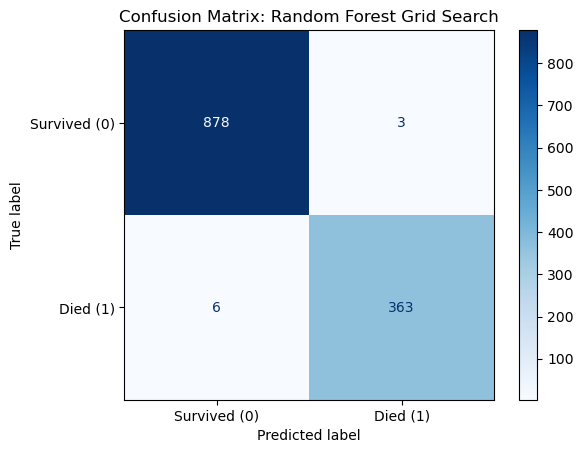

In [314]:
#Plotting confusion matrix to show summary of model's grid search performance
confusion_mat = confusion_matrix(new_y_test, new_y_pred_rf)
display_rf_grid = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_best_rf, display_labels = ['Survived (0)', 'Died (1)'])

plt.figure(figsize=(10,10))

display_rf_grid.plot(cmap='Blues', values_format = '.0f')
plt.title("Confusion Matrix: Random Forest Grid Search")

plt.plot()

# Confusion Matrix - Classifier

[]

<Figure size 1000x1000 with 0 Axes>

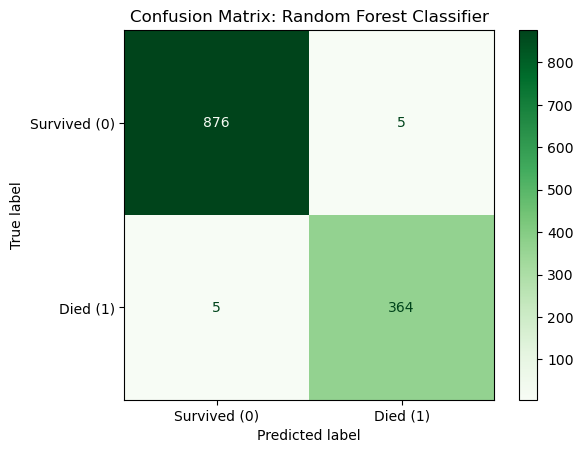

In [316]:
#Plotting confusion matrix to show summary of model's grid search performance
confusion_mat = confusion_matrix(new_y_test, new_y_pred_rf)
display_rf = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['Survived (0)', 'Died (1)'])

plt.figure(figsize=(10,10))

display_rf.plot(cmap='Greens', values_format = '.0f')
plt.title("Confusion Matrix: Random Forest Classifier")

plt.plot()